## Cell contribution

Since we are dealing with whole embryos, our results might be influenced by a couple cell types which occur a lot (e.g. brain). Luckily for us the recent paper, *[Mapping single-cell atlases throughout Metazoa unravels cell type evolution](https://www.biorxiv.org/content/10.1101/2020.09.28.317784v1)*, provides us a way to quantify the number of cell types over time in the developing embryo of mouse, zebrafish and frog. 

In [1]:
import random
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt

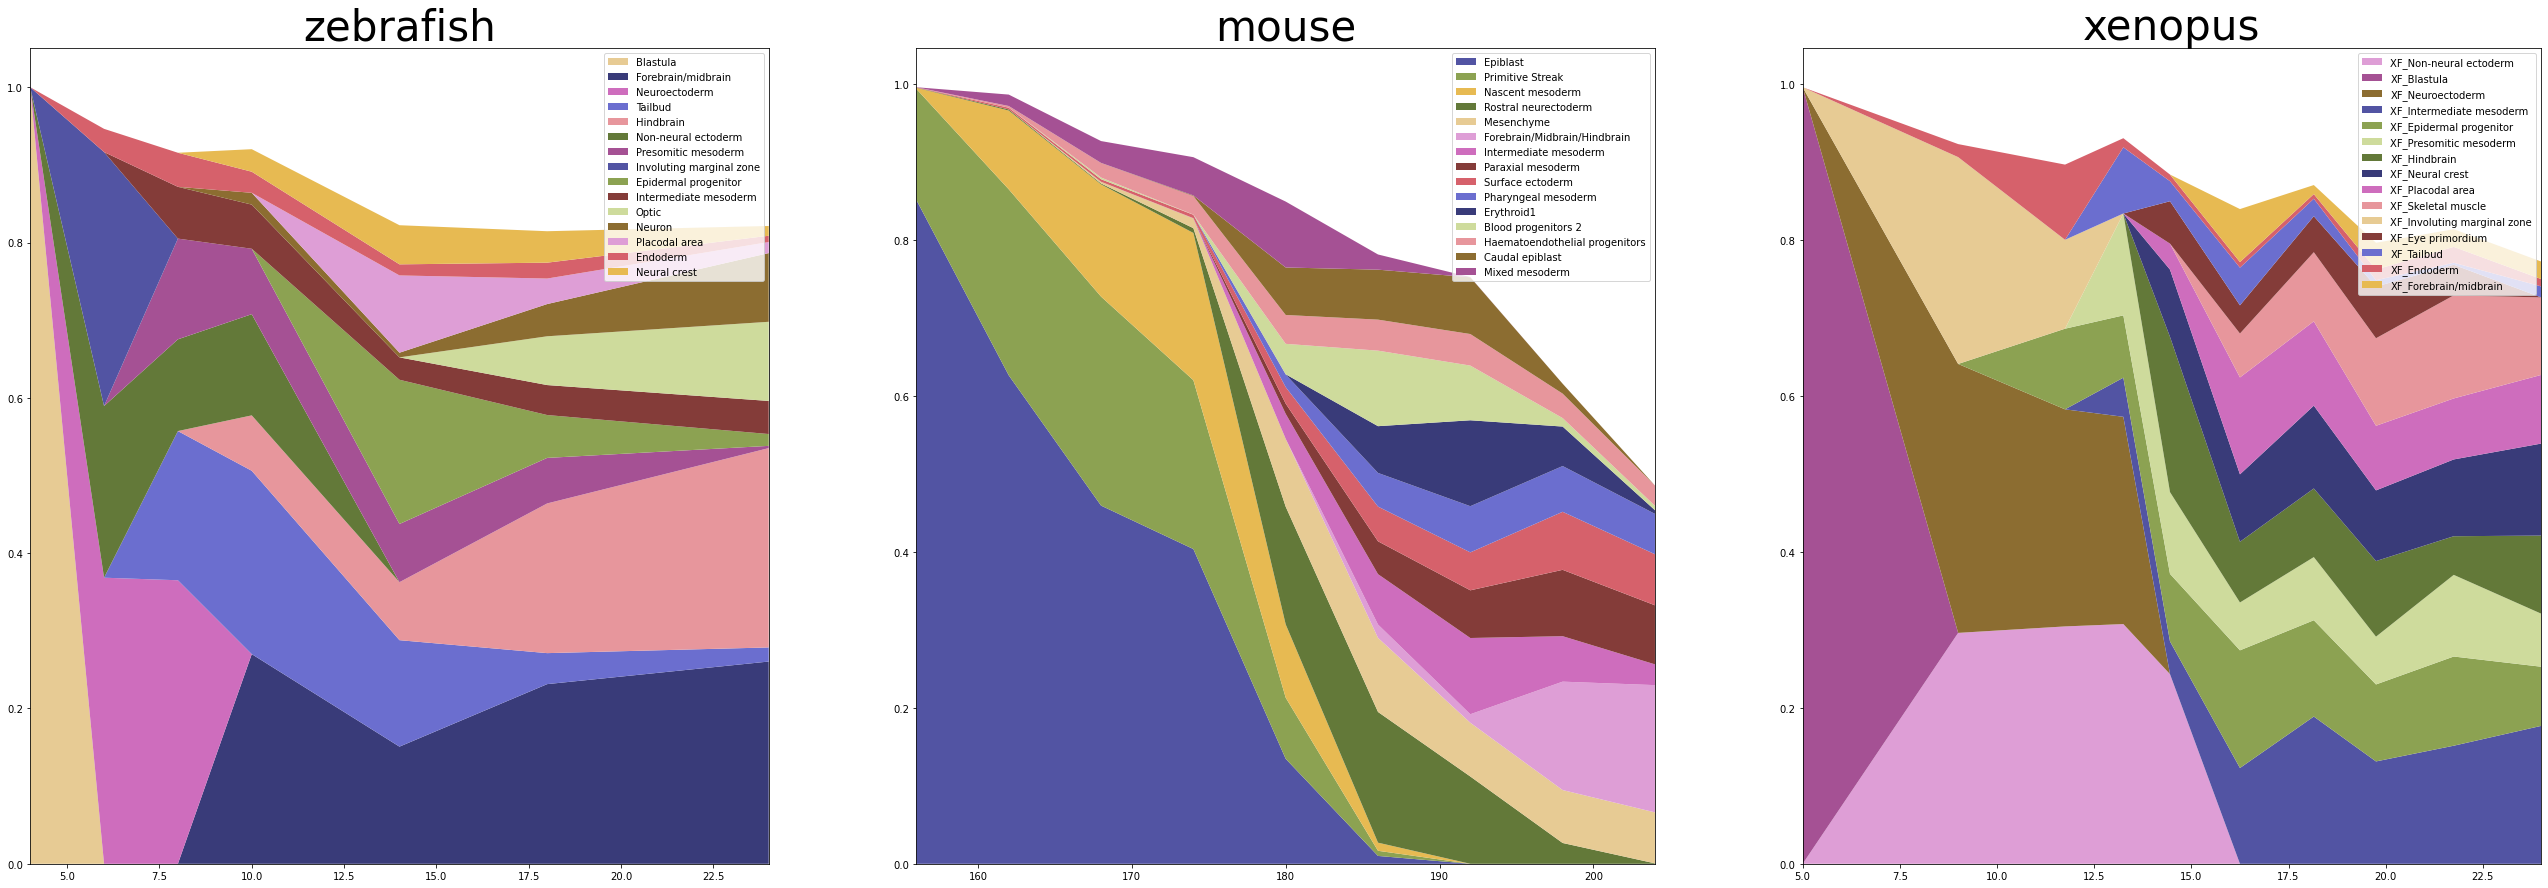

In [2]:
fix, axes = plt.subplots(figsize=(45,15), ncols=3)

for i, species in enumerate(["zebrafish", "mouse", "xenopus"]):
    ax = axes[i]
    ax.set_title(species, fontsize=42)
    df = pd.read_table(f"../data/scmetazoamap/{species}.tsv", sep="\t", comment="#", index_col=0)
    hpfs = sorted(set(df["Hpf"].to_list()))

    #
    counters = {hpf: Counter(df[df["Hpf"] == hpf]["Cell type"]) for hpf in hpfs}
    counters = {
        hpf: {
            cell_type: counts / sum(counter.values())
            for cell_type, counts in counter.items()
        } 
        for hpf, counter in counters.items()
    }

    # now get the top n nr of highest occurance cell types
    nr_distinct_cell_types = 15
    cell_types = set([key for hpf, counter in counters.items() for key in counter.keys()])
    cell_types_contributions = {cell_type: sum(counter[cell_type] for counter in counters.values() if cell_type in counter) for cell_type in cell_types}
    cell_types_contributions = dict(sorted(cell_types_contributions.items(), key=lambda x: x[1], reverse=True))
    distinct_cell_types = list(cell_types_contributions.keys())[:nr_distinct_cell_types]

    # prepare the plot
    indices = range(len(hpfs))
    bottom = [0 for hpf in hpfs]
    values = {cell_type: [] for cell_type in distinct_cell_types}
    for cell_type, vals in values.items():
        for hpf in hpfs:
            vals.append(counters[hpf].get(cell_type, 0))


    # and plot
    cmap = plt.cm.get_cmap("tab20b", nr_distinct_cell_types)
    color_order = list(range(nr_distinct_cell_types))
    random.shuffle(color_order)
    ax.stackplot(hpfs, values.values(),
                 labels=values.keys(), colors=[cmap(i) for i in color_order[:nr_distinct_cell_types]])
    ax.legend(loc='upper right')
    ax.set_xlim([hpfs[0], hpfs[-1]])